# Analysis section
Might be considered pre-processing as well


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
coursename='221005_eksempelsegment001.xlsx'
TDF0=pd.read_excel(coursename)

In [3]:
TDF0['position_lat'] = TDF0['position_lat']/(2**32/360)
TDF0['position_long'] = TDF0['position_long']/(2**32/360)

In [4]:
TDF0.head

<bound method NDFrame.head of       speed  position_lat  position_long  altitude  gradient  distance
0     6.028     60.059437      10.770156     434.2  0.034101      0.00
1     6.177     60.059445      10.770269     434.6  0.048780      5.83
2     6.214     60.059453      10.770371     434.8  0.033250     12.30
3     6.000     60.059458      10.770479     435.0  0.017021     17.86
4     5.720     60.059465      10.770576     435.0  0.034394     24.05
..      ...           ...            ...       ...       ...       ...
176   9.965     60.055117      10.788111     404.8 -0.009038   1415.89
177  10.525     60.055013      10.788118     404.6 -0.025381   1427.56
178  11.029     60.054914      10.788143     404.2 -0.026132   1439.53
179  11.113     60.054814      10.788185     404.0 -0.017889   1450.52
180  11.141     60.054721      10.788254     403.8 -0.026608   1461.89

[181 rows x 6 columns]>

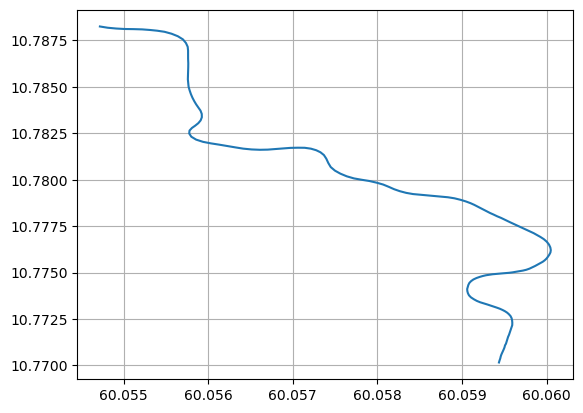

In [5]:
fig=plt.figure()
ax0=fig.add_subplot(1,1,1)
ax0.plot(TDF0['position_lat'],TDF0['position_long'])
ax0.grid()

In [6]:
coordinates=TDF0[["position_lat","position_long","altitude"]]
# print(coordinates)
print(tabulate(coordinates[0:10],headers='keys',tablefmt='github'))

|    |   position_lat |   position_long |   altitude |
|----|----------------|-----------------|------------|
|  0 |        60.0594 |         10.7702 |      434.2 |
|  1 |        60.0594 |         10.7703 |      434.6 |
|  2 |        60.0595 |         10.7704 |      434.8 |
|  3 |        60.0595 |         10.7705 |      435   |
|  4 |        60.0595 |         10.7706 |      435   |
|  5 |        60.0595 |         10.7707 |      435.4 |
|  6 |        60.0595 |         10.7708 |      435.4 |
|  7 |        60.0595 |         10.7709 |      435.8 |
|  8 |        60.0595 |         10.771  |      436.2 |
|  9 |        60.0595 |         10.7711 |      436.4 |


In [7]:
def vector(point1, point2):
    x=point2[0]-point1[0]
    y=point2[1]-point1[1]
    z=point2[2]-point1[2]
    return (x, y, z)


In [8]:
v0=vector(coordinates.iloc[0].tolist(),coordinates.iloc[1].tolist())
print([sum(x) for x in zip(v0, coordinates.iloc[0].tolist())]==coordinates.iloc[1].tolist())

True


In [9]:
coordinates=TDF0[["position_lat","position_long","altitude"]]
VectorCoordinates=[coordinates.iloc[0].tolist()]*TDF0.shape[0]
# point=0
# VectorCoordinates[point]=vector(coordinates.iloc[0].tolist(),coordinates.iloc[1].tolist())
for point in range(0,TDF0.shape[0]-1):
    VectorCoordinates[point+1]=vector(coordinates.iloc[point].tolist(),coordinates.iloc[point+1].tolist())
VectorDataframe=pd.DataFrame(VectorCoordinates,columns=['position_lat',"position_long","altitude"])

In [10]:
SS0=coordinates[0:10]
SS1=VectorDataframe[0:10]
print(SS0,SS1)

   position_lat  position_long  altitude
0     60.059437      10.770156     434.2
1     60.059445      10.770269     434.6
2     60.059453      10.770371     434.8
3     60.059458      10.770479     435.0
4     60.059465      10.770576     435.0
5     60.059475      10.770670     435.4
6     60.059484      10.770770     435.4
7     60.059495      10.770874     435.8
8     60.059503      10.770971     436.2
9     60.059509      10.771076     436.4    position_lat  position_long  altitude
0     60.059437      10.770156     434.2
1      0.000007       0.000113       0.4
2      0.000008       0.000102       0.2
3      0.000006       0.000108       0.2
4      0.000007       0.000097       0.0
5      0.000010       0.000094       0.4
6      0.000009       0.000100       0.0
7      0.000011       0.000104       0.4
8      0.000008       0.000098       0.4
9      0.000006       0.000105       0.2


In [11]:
PLOTSS1=SS1
lat=SS1['position_lat']
lon=SS1['position_long']
alt=SS1['altitude']
clat=0
clon=0
calt=0
vclat=[]
vclon=[]
valt=[]

for i in range(len(SS1)):
    clat+=lat[i]
    clon+=lon[i]
    calt+=alt[i]
    vclat.append(clat)
    vclon.append(clon)
    valt.append(calt)
SS1['cposition_lat']=vclat
SS1['cposition_long']=vclon
SS1['caltitude']=valt

C:\Users\nieba\AppData\Local\Temp\ipykernel_7332\247455784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS1['cposition_lat']=vclat
C:\Users\nieba\AppData\Local\Temp\ipykernel_7332\247455784.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS1['cposition_long']=vclon
C:\Users\nieba\AppData\Local\Temp\ipykernel_7332\247455784.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

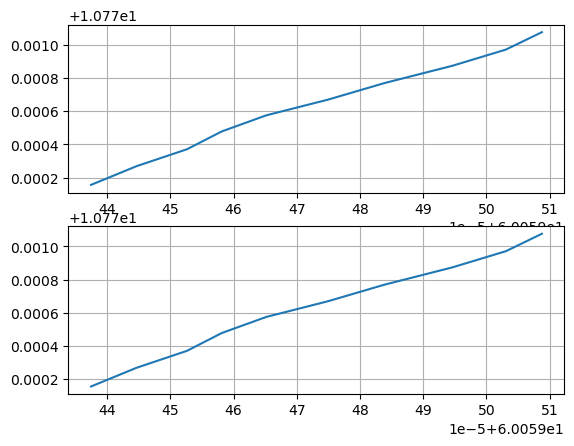

In [12]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)
ax0.plot(SS0['position_lat'],SS0['position_long'])
ax1.plot(SS1['cposition_lat'],SS1['cposition_long'])
ax0.grid()
ax1.grid()